Take the data_statistics.csv file that shows us how many images we have for species. Merge with the moths list CSV file. Then create a histogram to see how many images we have for each species.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(2,10)})
plt.figure(figsize=(2,5))

In [ ]:
home_dir = os.path.dirname(os.getcwd())
home_dir

In [22]:
checklist_name = "singapore-moths-keys"

data_stats = pd.read_csv(
    os.path.join(home_dir,"data_stats_files","data_stats_"+checklist_name+".csv")
    )

data_stats

,accepted_taxon_key,order_name,family_name,genus_name,species_name_provided,authority_name_provided,search_species_name,gbif_species_name,confidence,status,match_type,rank,source,n_imgs
0,1860942,Lepidoptera,Adelidae,Nemophora,Nemophora aurisparsella,NaN,Nemophora aurisparsella,Nemophora aurisparsella,99,ACCEPTED,EXACT,SPECIES,London06October2023,0
1,1860786,Lepidoptera,Adelidae,Nemophora,Nemophora decisella,"Walker, 1863",Nemophora decisella,Nemophora decisella,99,ACCEPTED,EXACT,SPECIES,London06October2023,20
2,1830702,Lepidoptera,Attevidae,Atteva,Atteva fabriciella,NaN,Atteva fabriciella,Atteva fabriciella,99,ACCEPTED,EXACT,SPECIES,London06October2023,12
3,9004359,Lepidoptera,Attevidae,Atteva,Atteva wallengreni,NaN,Atteva wallengreni,Atteva wallengreni,99,ACCEPTED,EXACT,SPECIES,London06October2023,52
4,11537408,Lepidoptera,Bombycidae,Gunda,Gunda subnotata,"Walker,1859",Gunda subnotata,Gunda subnotata,99,ACCEPTED,EXACT,SPECIES,London06October2023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1754533,Lepidoptera,Zygaenidae,Pidorus,Pidorus corculum,"Butler,1879",Pidorus corculum,Pidorus corculum,99,ACCEPTED,EXACT,SPECIES,London06October2023,5
1341,1754263,Lepidoptera,Zygaenidae,Pompelon,Pompelon marginata,"Guerin,1843",Pompelon marginata,Pompelon marginata,99,ACCEPTED,EXACT,SPECIES,London06October2023,124
1342,1754497,Lepidoptera,Zygaenidae,Prosopandrophila,Prosopandrophila distincta,NaN,Prosopandrophila distincta,Prosopandrophila distincta,99,ACCEPTED,EXACT,SPECIES,London06October2023,25
1343,1754712,Lepidoptera,Zygaenidae,Psaphis,Psaphis camadeva,"Doubleday,1847",Psaphis camadeva,Psaphis camadeva,99,ACCEPTED,EXACT,SPECIES,London06October2023,1


In [23]:
# How many with 1000? 
n_species = len(data_stats)

n_species_1000 = len(data_stats[data_stats["n_imgs"] == 1000])
print(f"({n_species_1000} species have 1000 images, out of {n_species}")

n_species_0 = len(data_stats[data_stats["n_imgs"] == 0])
print(f"({n_species_0} species have 0 images, out of {n_species}")

(49 species have 1000 images, out of 1345
(194 species have 0 images, out of 1345


/Users/lbokeria/miniforge3/envs/gbif_download_standalone/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


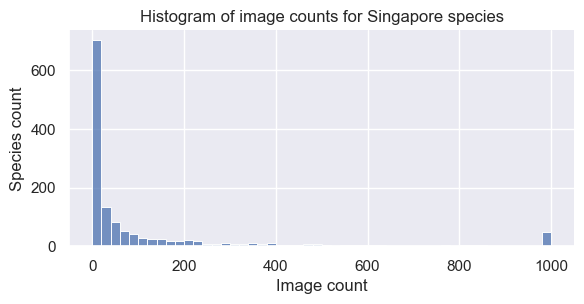

In [25]:
fig = sns.displot(data_stats,
                  x="n_imgs",
                  binwidth=20,
                  height=3,
                  aspect=2).set(title="Histogram of image counts for Singapore species")

fig.set(xlabel="Image count")
fig.set(ylabel="Species count")

# sns.barplot(x = "gbif_species_name",
#             y = "n_imgs",
#             data = data_stats[data_stats["n_imgs"] == 1000])
# plt.xticks(rotation=90)

/Users/lbokeria/miniforge3/envs/gbif_download_standalone/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 150.0)

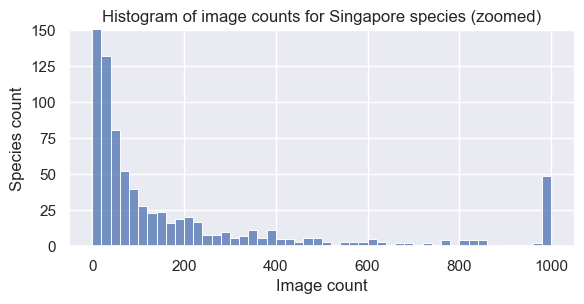

In [28]:
fig2 = sns.displot(data_stats,
                  x="n_imgs",
                  binwidth=20,
                  height=3,
                  aspect=2).set(title="Histogram of image counts for Singapore species (zoomed)")

fig2.set(xlabel="Image count")
fig2.set(ylabel="Species count")

plt.ylim(0,150)

In [29]:
a = pd.read_csv("/Users/lbokeria/Documents/projects/gbif_download_standalone/03_download_images/data_stats_log_files/mismatch_list_costarica-moths-keys-nodup.csv")